In [3]:
# K-means clustering with scaling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = pd.read_csv("data/standard_features.csv")
labels = pd.read_csv("data/labels.csv").to_numpy()

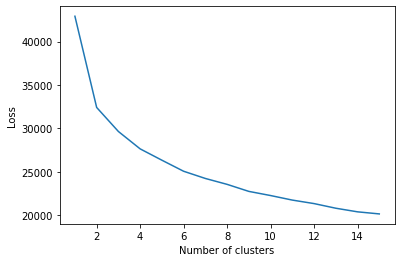

In [4]:
maxK = 15
losses = {}
for k in range(1, maxK + 1):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(features)
    losses[k] = kmeans.inertia_
    
plt.figure()
plt.plot(list(losses.keys()), list(losses.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Loss")
plt.show()

<BarContainer object of 5 artists>

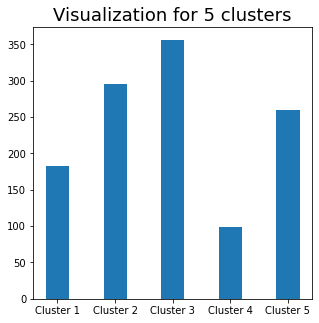

In [5]:
k = 5
kmeans = KMeans(n_clusters=k, max_iter=1000).fit(features)
num_list = [np.sum(np.array(kmeans.labels_) == i) for i in range(0,k)]
name_list = [("Cluster " + str(i)) for i in range(1, k+1)]

x = list(range(len(num_list)))
total_width, n = 0.8, 2
width = total_width / n
plt.figure(figsize=(k,5))
plt.title('Visualization for '+ str(k) + ' clusters', fontdict = {'fontsize' : 18})
plt.bar(x, num_list, width=width, label='number',tick_label = name_list)

<BarContainer object of 5 artists>

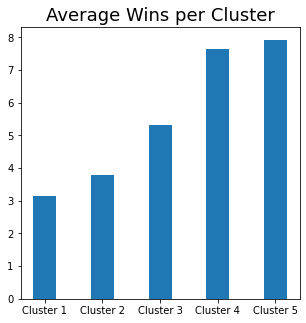

In [6]:
avg_wins = np.zeros(k)
for i in range(len(kmeans.labels_)):
    avg_wins[kmeans.labels_[i]] += labels[i]
avg_wins /= num_list
avg_wins = np.sort(avg_wins)

x = list(range(len(num_list)))
total_width, n = 0.8, 2
width = total_width / n
plt.figure(figsize=(k,5))
plt.title('Average Wins per Cluster', fontdict = {'fontsize' : 18})
plt.bar(x, avg_wins, width=width, label='number',tick_label = name_list)